In [ ]:
import numpy as np
np.random.seed(42)
X = np.linspace(-10, 10, 100)
y = 2 + 3*X + 0.5*X**2 + np.random.normal(0, 2, len(X))

In [ ]:

import matplotlib.pyplot as plt


In [ ]:
plt.scatter(X, y, color='blue', label='Synthetic Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Dataset (Linear Regression)")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (y = 3x + 5 + noise)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random values between 0 and 2
y = 5 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Plot the data
plt.scatter(X, y, color='blue', label='Synthetic Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Dataset (Linear Regression)")
plt.legend()
plt.show()

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        gradient = (1/m) * X.T.dot(predictions - y)
        theta -= alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [ ]:
# Add bias term (X0 = 1)
X_b = np.c_[np.ones((len(X), 1)), X]  # Shape: (100, 2)


# Initialize theta (random or zeros)
theta_initial = np.random.randn(2, 1)

# Hyperparameters
alpha = 0.1  # Learning rate
iterations = 1000

# Run Gradient Descent
theta_final, cost_history = gradient_descent(X_b, y, theta_initial, alpha, iterations)

print("Optimal Theta:", theta_final.ravel())

In [ ]:
# Plot the regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, X_b.dot(theta_final), color='red', label='Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Plot cost vs. iterations (to check convergence)
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term to training and validation sets
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_val_b = np.c_[np.ones((len(X_val), 1)), X_val]

In [ ]:
# Initialize random theta
theta_initial = np.random.randn(2, 1)

# Hyperparameters
alpha = 0.1  # Learning rate
iterations = 1000

# Run Gradient Descent on training data
theta_final, cost_history = gradient_descent(X_train_b, y_train, theta_initial, alpha, iterations)

In [ ]:


train_mse = compute_cost(X_train_b, y_train, theta_final)
print(f"Training MSE: {train_mse:.4f}")

In [ ]:
val_mse = compute_cost(X_val_b, y_val, theta_final)
print(f"Validation MSE: {val_mse:.4f}")

In [ ]:
train_errors, val_errors = [], []
m_range = range(10, len(X_train), 5)
print(m_range)
for m in m_range:
    theta, _ = gradient_descent(X_train_b[:m], y_train[:m], theta_initial, alpha, 100)
    train_errors.append(compute_mse(X_train_b[:m], y_train[:m], theta))
    val_errors.append(compute_mse(X_val_b, y_val, theta))

plt.plot(m_range, train_errors, label="Training Error")
plt.plot(m_range, val_errors, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_poly_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    return X_poly

# Example: Create 2nd-degree polynomial features
X_poly = create_poly_features(X, degree=2)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_learning_curve(X, y, degree, alpha=0.1, iterations=1000):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    train_errors, val_errors = [], []
    m_range = range(10, len(X_train), 5)  # Training set sizes
    
    for m in m_range:
        # Create polynomial features for current subset
        X_train_poly = create_poly_features(X_train[:m], degree)
        X_val_poly = create_poly_features(X_val, degree)
        
        # Train model
        theta = np.random.randn(X_train_poly.shape[1], 1)
        theta, _ = gradient_descent(X_train_poly, y_train[:m], theta, alpha, iterations)
        
        # Compute errors
        train_pred = X_train_poly.dot(theta)
        val_pred = X_val_poly.dot(theta)
        train_errors.append(mean_squared_error(y_train[:m], train_pred))
        val_errors.append(mean_squared_error(y_val, val_pred))
    
    # Plot
    plt.plot(m_range, train_errors, label=f"Training Error (d={degree})")
    plt.plot(m_range, val_errors, label=f"Validation Error (d={degree})")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

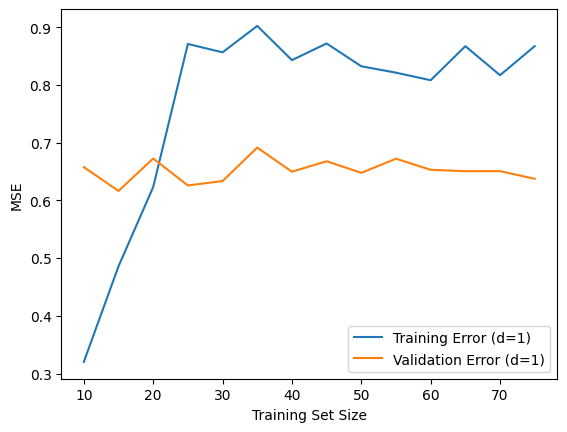

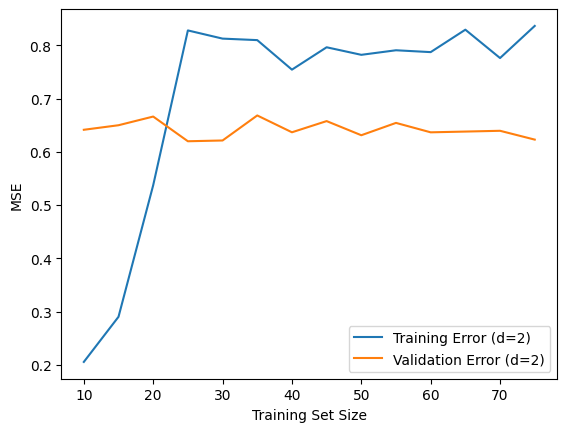

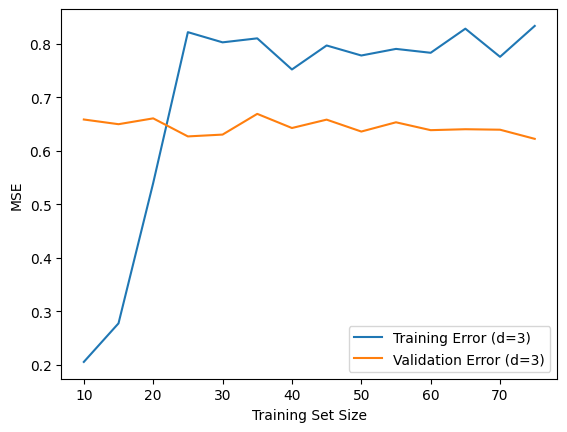

/var/folders/9_/vl83qy_n3h70h0_7s92syt7h0000gn/T/ipykernel_16176/1593553583.py:4: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((predictions - y)**2)
/var/folders/9_/vl83qy_n3h70h0_7s92syt7h0000gn/T/ipykernel_16176/989251320.py:8: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradient


ValueError: Input contains NaN.

In [65]:
degrees = [1, 2, 3, 4, 5]  # Test these polynomial degrees
best_degree = None
best_val_error = float('inf')

for degree in degrees:
    plot_learning_curve(X, y, degree)  # Visualize learning curves
    
    # Compute final validation error for this degree
    X_poly = create_poly_features(X, degree)
    X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    theta = np.random.randn(X_train_poly.shape[1], 1)
    theta, _ = gradient_descent(X_train_poly, y_train, theta, alpha=0.1, iterations=1000)
    val_pred = X_val_poly.dot(theta)
    val_error = mean_squared_error(y_val, val_pred)
    
    # Update best degree
    if val_error < best_val_error:
        best_val_error = val_error
        best_degree = degree

print(f"Best degree: {best_degree}, Validation MSE: {best_val_error:.4f}")